# **Prediction using Supervised Learning**
Today we will be implementing a simple decision tree model to classify iris plants into three species using the lengths and widths of their petals and sepals, a classic data set in the machine learning community.

## **Decision Trees**
Decision tree models are the simplest form of tree-based models, and are arguably the simplest form of supervised multivariate classification models. A series of logical tests (generally in the form of boolean comparisons) are applied to the sample entries and their resulting subsets in turn to arrive at a final decision. It is very easy to visualize the decision process in a simple flowchart to trace the rational of every assignment made by a decision tree model, making it among the most interpretable of models.

### Author : Ishardina Cholifatul Hidayati

In [ ]:
# import all libraries required in this notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
# load iris dataset
iris = datasets.load_iris()  
x = iris.data
y = iris.target
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["types"] = y # assign types
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),types
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


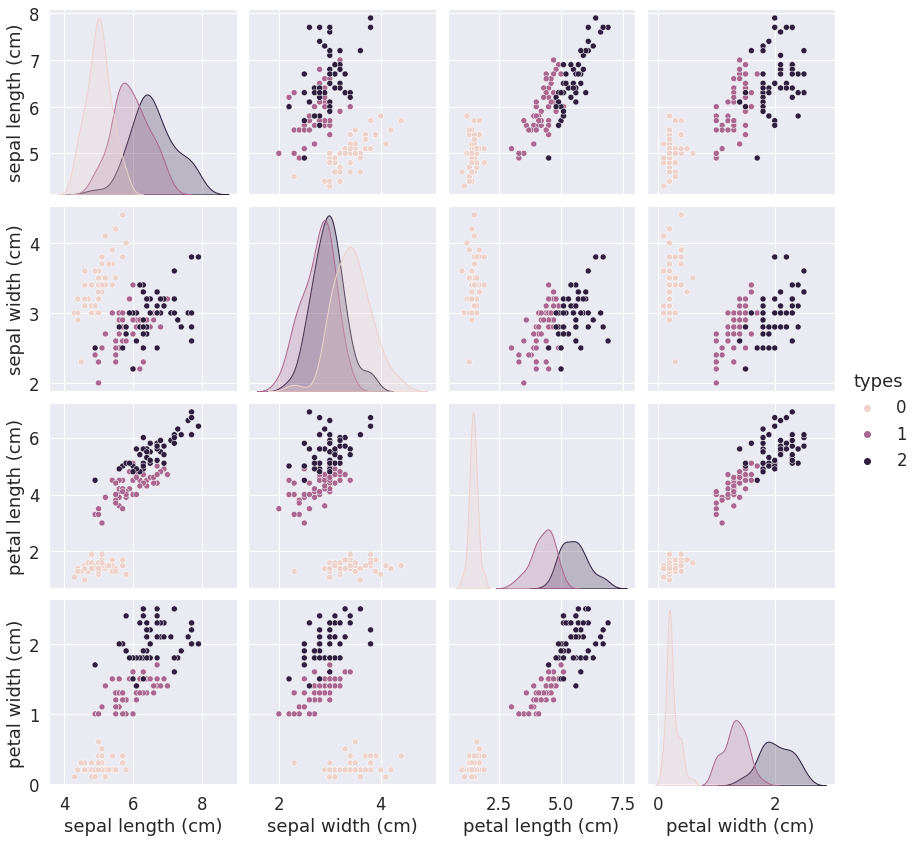

In [ ]:
#plot the distribution of data
sns.set(font_scale=1.5)
sns.pairplot(df, hue='types', size=3)
plt.show()

### **Preparing the Data**
We have separate the features (input) as x and labels (output) as y. Because we will classify iris plants into three species using the lengths and widths of their petals and sepals. The input used is the value in the 'sepal_length', 'sepal_width', 'petal_length', and 'pelat_width'  while the output is value in the 'types' column.

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
#split data into train data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=5)

### **Training the Algorithm**

In [ ]:
# Scikit-Learn Decision tree model training
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

### **Visualize the Tree**

In [ ]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [ ]:
#import libraries required
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

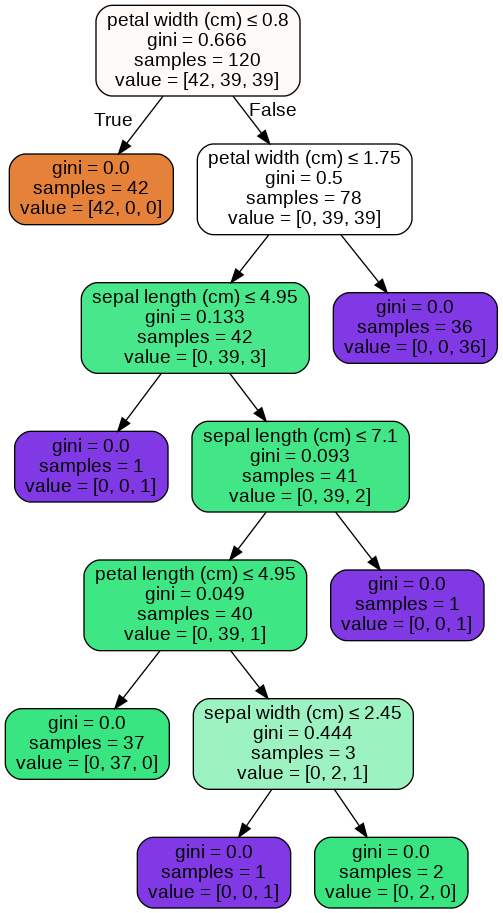

In [ ]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### **Making Predictions**
After conducting training data, we get a Decision Trees model from the data we use. Furthermore, with the same model we apply the untrained data.

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# Comparing Actual vs Predicted
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df2  

,Actual,Predicted
0,1,1
1,2,1
2,2,2
3,0,0
4,2,2
5,1,2
6,0,0
7,1,2
8,0,0
9,1,1


In [ ]:
# test with other data
feature = [[5.0, 2.5, 3.7, 1.2]]
prediction = model.predict(feature)

if prediction==[0]:
    print('The prediction is : Iris-setosa')
elif prediction==[1]:
    print('The prediction is : Iris-versicolor')  
else:
    print('The prediction is : Iris-virginica')

The prediction is : Iris-versicolor


### **Evaluating the Model**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the cross validation.

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.96 (+/- 0.07)
